In [1]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
from uta import solve_lp_problem_gms, plot_utility_functions, create_full_ranking_df, check_consistency, obtain_relations

In [2]:
df = pd.read_csv('Nuclear waste management.csv', index_col=0)

In [3]:
preferential_information = [(5, 1), (11, 24), (14, 27)]
indifference_information = [(3, 7), (22, 23)]

In [4]:
problem, u_vars, criteria = solve_lp_problem_gms(df, preferential_information, indifference_information, verbose=False)

Status: Optimal


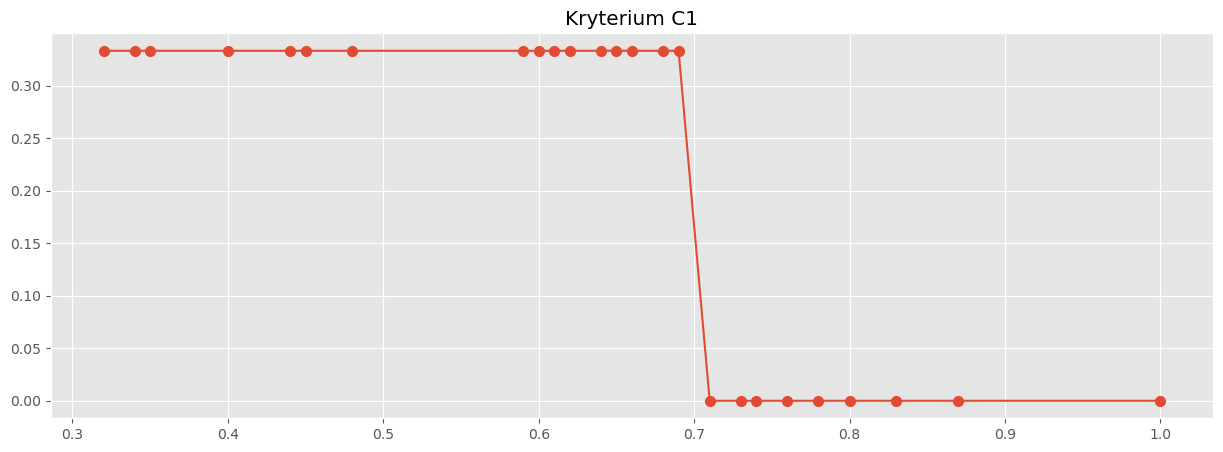

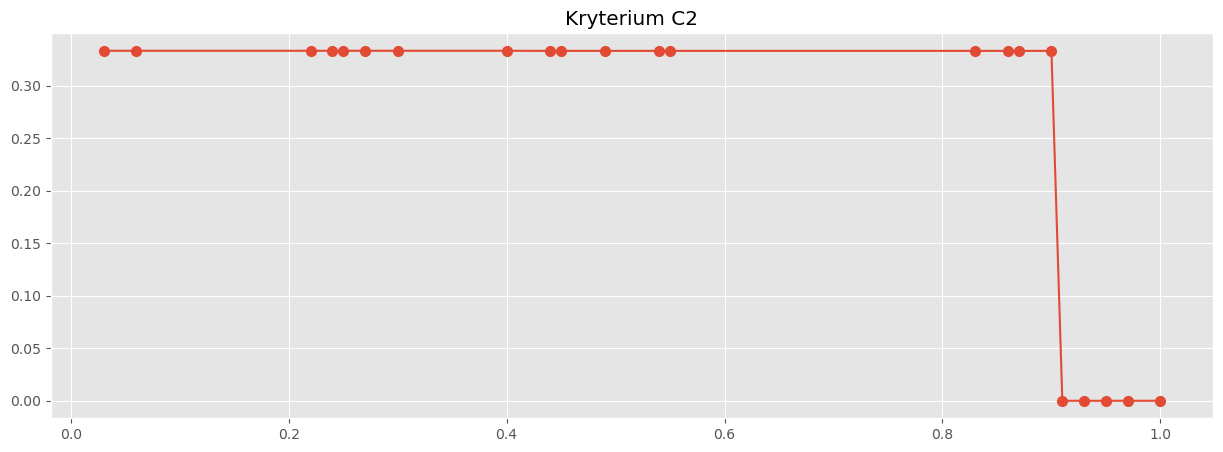

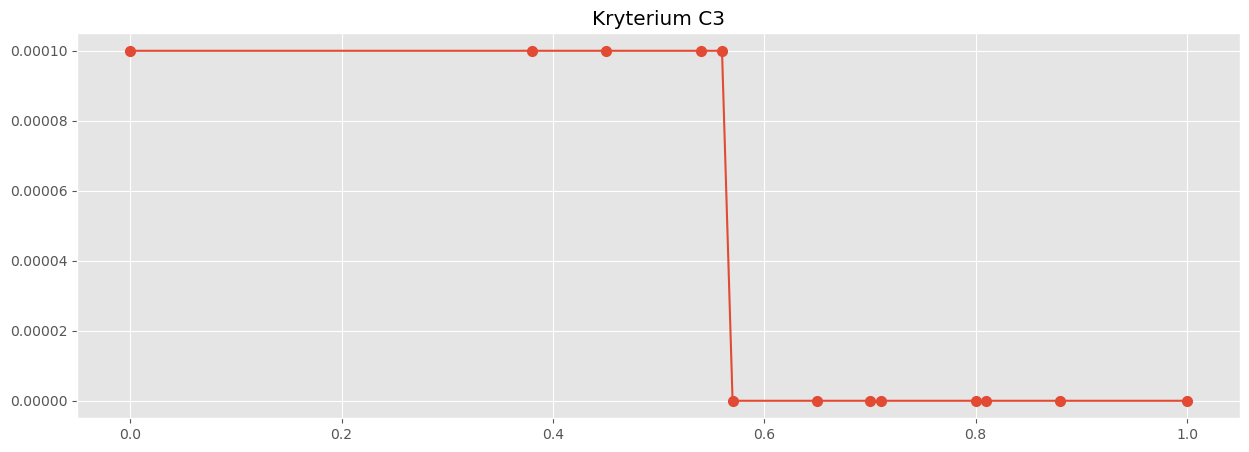

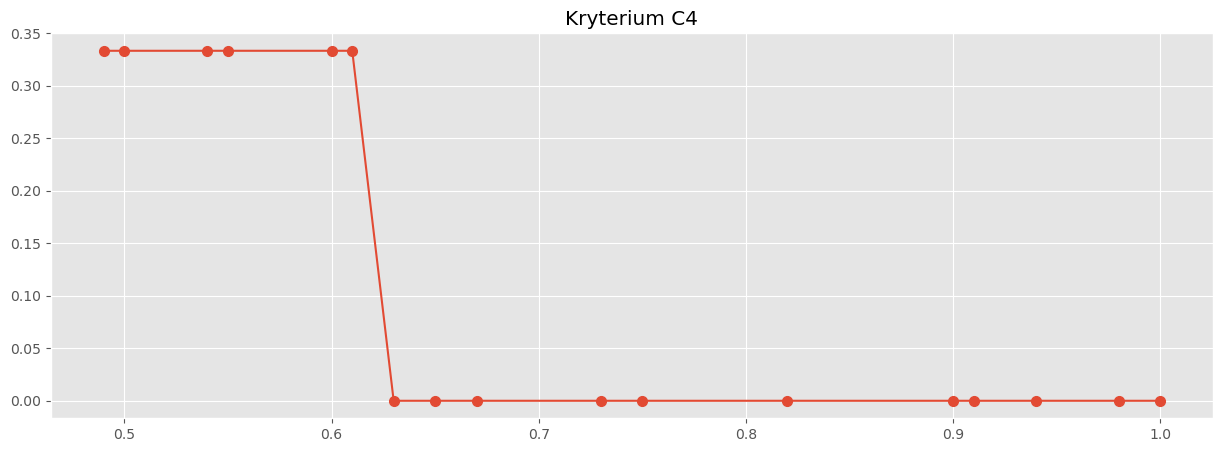

In [5]:
plot_utility_functions(problem, u_vars, criteria)

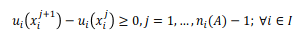

In [6]:
rank = create_full_ranking_df(df, problem, criteria)

In [7]:
check_consistency(rank, preferential_information, indifference_information)

True

In [8]:
rank.sort_values(by='U', ascending=False)

,C1,C2,C3,C4,u1,u2,u3,u4,U
5,0.62,0.40,0.56,0.50,0.333267,0.333267,0.0001,0.333367,1.0
14,0.69,0.49,0.56,0.61,0.333267,0.333167,0.0001,0.333367,0.9999
11,0.61,0.54,0.38,0.49,0.333267,0.333167,0.0001,0.333367,0.9999
17,0.68,0.40,0.65,0.60,0.333267,0.333267,0.0,0.333367,0.9999
2,0.66,0.55,0.45,0.49,0.333267,0.333167,0.0001,0.333367,0.9999
8,0.64,0.44,0.54,0.54,0.333267,0.333167,0.0001,0.333367,0.9999
9,0.65,0.30,0.71,0.55,0.333267,0.333267,0.0,0.333367,0.9999
15,0.87,0.03,1.00,0.61,0.0,0.333267,0.0,0.333367,0.666633
12,0.74,0.25,0.80,0.49,0.0,0.333267,0.0,0.333367,0.666633
18,0.76,0.06,1.00,0.60,0.0,0.333267,0.0,0.333367,0.666633


In [9]:
necessarily_preferred, possibly_preffered = obtain_relations(rank)

In [10]:
all_alternatives = [v for s in preferential_information + indifference_information for v in s]
data = necessarily_preferred.copy()
data = {key: [val for val in values if val in all_alternatives] for key, values in data.items() if key in all_alternatives}

In [11]:
data

{1: [],
 3: [],
 5: [1, 3, 7, 11, 14, 22, 23, 24, 27],
 7: [1, 22],
 11: [1, 3, 7, 14, 22],
 14: [1, 3, 7, 11, 22],
 22: [1, 7],
 23: [24, 27],
 24: [27],
 27: [24]}

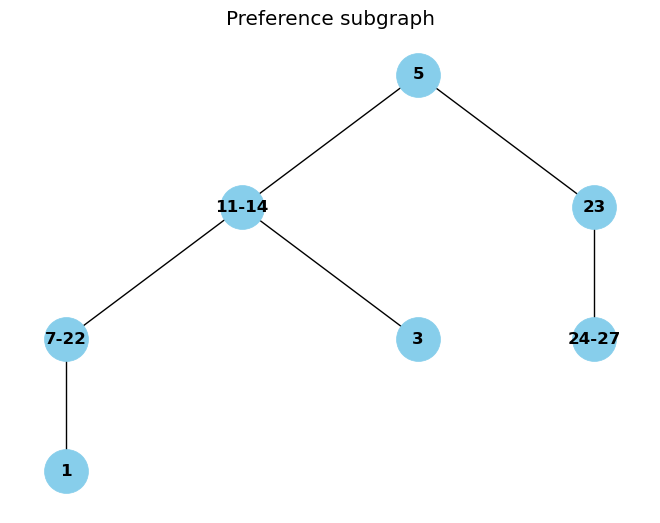

In [12]:
G = nx.Graph()
nodes = [1, 5, "11-14", 23, "7-22", "24-27", 3]
G.add_nodes_from(nodes)
edges = [(5, "11-14"), ("11-14", "7-22"), ("7-22", 1), (5, 23), (23, "24-27"), ("11-14", 3)]
G.add_edges_from(edges)
pos = {5: (0,0), "11-14": (-0.5,-1),"7-22": (-1,-2), 3: (0,-2), 1: (-1,-3), 23: (0.5,-1), "24-27": (0.5,-2)}
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold')
plt.title('Preference subgraph')
plt.savefig("Hesse.png")
plt.show()

In [13]:
edges = []
for node, successors in necessarily_preferred.items():
    for successor in successors:
        edges.append((node, successor))

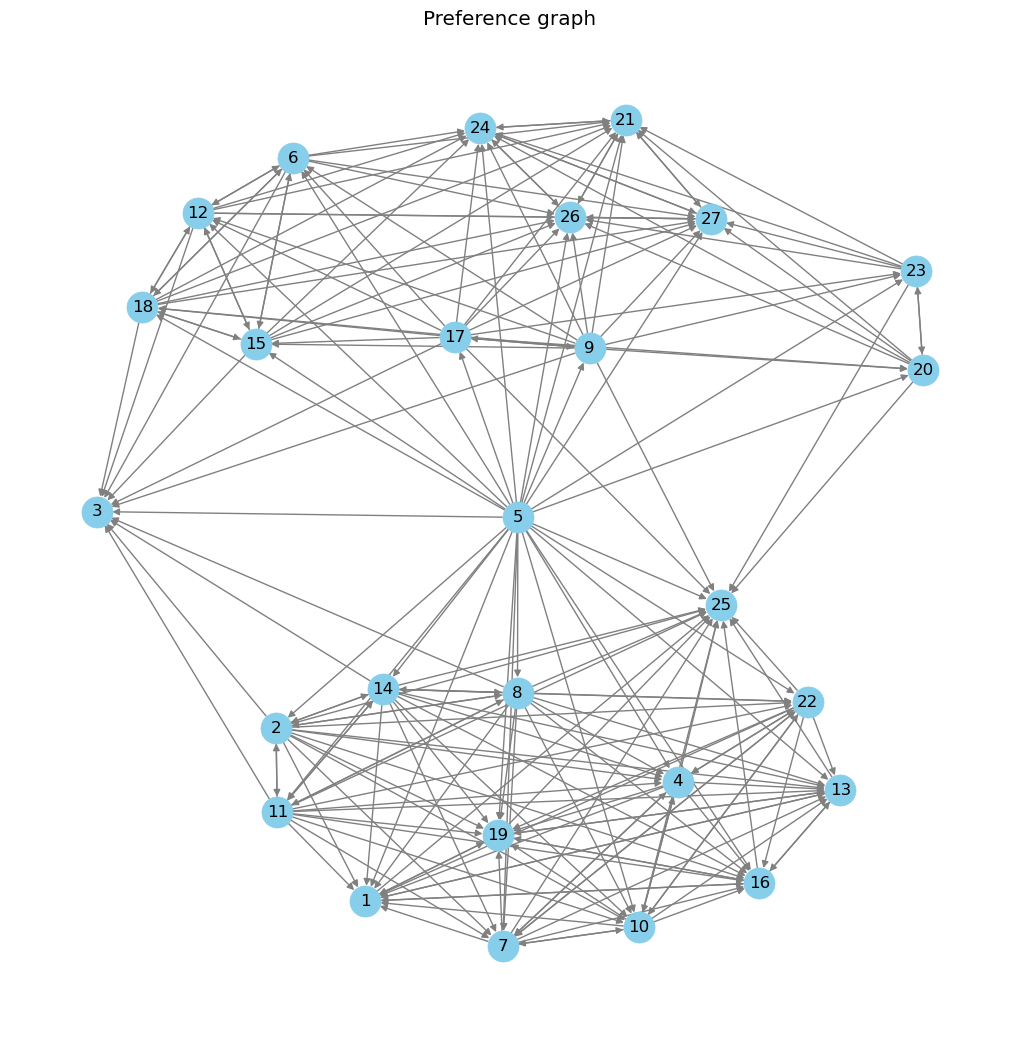

In [14]:
G = nx.DiGraph(edges)
pos = nx.nx_agraph.graphviz_layout(G)
plt.figure(figsize=(10, 10)) 
nx.draw(G, pos, node_color='skyblue', edge_color='gray', with_labels=True, node_size=500)
plt.title("Preference graph")
plt.savefig('Hesse_full.png')
plt.show()

In [15]:
from uta import most_representative_function
problem2, u_vars2, criteria2 = most_representative_function(
        df,
        preferential_information,
        indifference_information,
        necessarily_preferred,
        possibly_preffered,
        verbose=False)

rank2 = create_full_ranking_df(df, problem2, criteria2)

Status: Optimal


In [16]:
print(check_consistency(rank2, preferential_information, indifference_information))
rank2.sort_values(by='U', ascending=False)

True


,C1,C2,C3,C4,u1,u2,u3,u4,U
5,0.62,0.40,0.56,0.50,0.333267,0.333267,0.0001,0.333367,1.0
14,0.69,0.49,0.56,0.61,0.333267,0.333167,0.0001,0.333367,0.9999
11,0.61,0.54,0.38,0.49,0.333267,0.333167,0.0001,0.333367,0.9999
17,0.68,0.40,0.65,0.60,0.333267,0.333267,0.0,0.333367,0.9999
2,0.66,0.55,0.45,0.49,0.333267,0.333167,0.0001,0.333367,0.9999
8,0.64,0.44,0.54,0.54,0.333267,0.333167,0.0001,0.333367,0.9999
9,0.65,0.30,0.71,0.55,0.333267,0.333267,0.0,0.333367,0.9999
15,0.87,0.03,1.00,0.61,0.0,0.333267,0.0,0.333367,0.666633
12,0.74,0.25,0.80,0.49,0.0,0.333267,0.0,0.333367,0.666633
18,0.76,0.06,1.00,0.60,0.0,0.333267,0.0,0.333367,0.666633


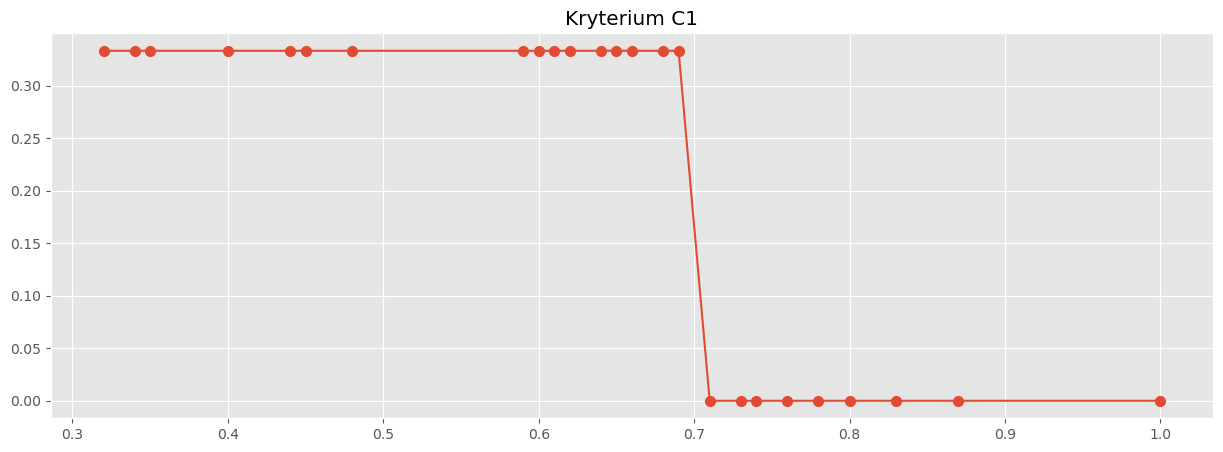

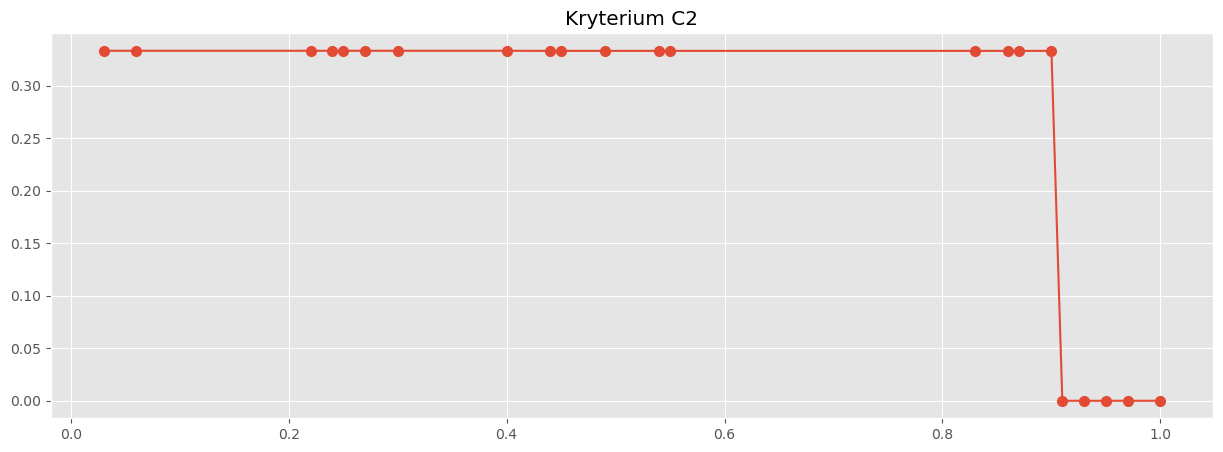

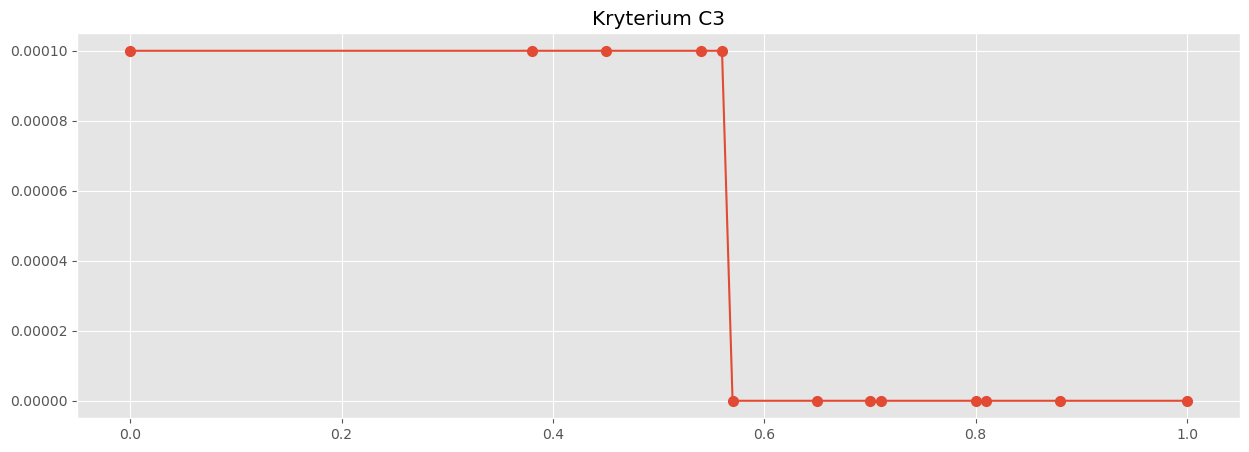

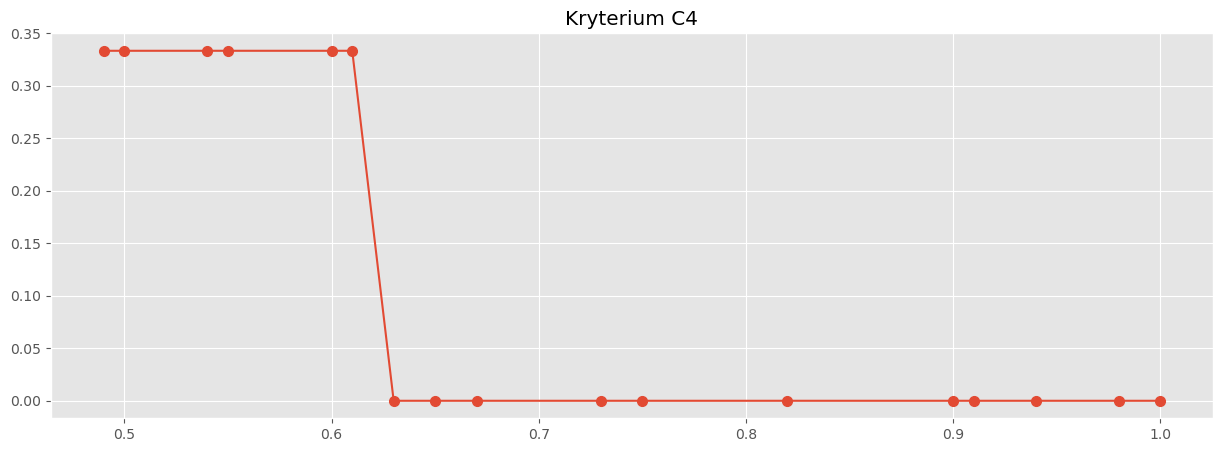

In [17]:
plot_utility_functions(problem, u_vars, criteria)

In [21]:
# print(rank.sort_values(by=['U'], ascending=False).to_markdown())

In [20]:
import pulp
print("Wartość funkcji celu:", pulp.value(problem.objective))

Wartość funkcji celu: 0.66663333
